In [ ]:
# prompt: load the Tensorflow model from My Google Drive


import tensorflow as tf

model = tf.keras.models.load_model('/content/drive/MyDrive/Models/efficientnet_model_3_12_classes.keras')
# Example usage
model.summary()
# predictions = model.predict(...)

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ data_augmentation (Sequential)       │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb0 (Functional)          │ (None, None, None, 1280)    │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling_layer         │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 12)                  │          15,372 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,095,689 (15.62 MB)

 Trainable params: 15,372 (60.05 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

 Optimizer params: 30,746 (120.11 KB)

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/cs329s-ml-deployment-tutorial/main/food-images/plant.jpeg

--2025-02-07 09:54:38--  https://raw.githubusercontent.com/mrdbourke/cs329s-ml-deployment-tutorial/main/food-images/plant.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 542790 (530K) [image/jpeg]
Saving to: ‘plant.jpeg’

plant.jpeg          100%[===================>] 530.07K  --.-KB/s    in 0.07s   

2025-02-07 09:54:38 (7.70 MB/s) - ‘plant.jpeg’ saved [542790/542790]



In [ ]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224, scale=False):
  """
  Reads in an image from filename, turns it into a tensor and reshapes into
  (224, 224, 3).
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode it into a tensor
  img = tf.image.decode_jpeg(img)
  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])
  # Rescale the image (get all values between 0 and 1)
  if scale:
    return img/255.
  else:
    return img

In [ ]:
plant = load_and_prep_image("plant.jpeg")
plant = tf.cast(tf.round(plant), dtype=tf.int32)
plant

<tf.Tensor: shape=(224, 224, 3), dtype=int32, numpy=
array([[[110,  96,  95],
        [107,  93,  92],
        [ 88,  74,  71],
        ...,
        [141, 155, 164],
        [207, 210, 209],
        [242, 241, 237]],

       [[117, 106, 104],
        [117, 106, 103],
        [116, 105, 101],
        ...,
        [132, 144, 152],
        [207, 207, 208],
        [202, 199, 201]],

       [[107,  96,  92],
        [119, 108, 104],
        [102,  91,  87],
        ...,
        [177, 187, 189],
        [206, 204, 202],
        [204, 200, 197]],

       ...,

       [[ 20,  70,  49],
        [ 37,  79,  57],
        [111, 159, 133],
        ...,
        [122, 175, 142],
        [ 84, 143, 110],
        [ 49, 116,  80]],

       [[120, 154, 131],
        [137, 164, 147],
        [108, 127, 111],
        ...,
        [103, 169, 133],
        [ 46,  95,  66],
        [ 83, 143, 110]],

       [[ 43,  83,  62],
        [ 20,  49,  31],
        [ 33,  74,  54],
        ...,
        [ 53, 117,  8

In [ ]:
model.predict(tf.expand_dims(plant, axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


array([[1.10649435e-05, 3.71319271e-04, 9.64987862e-07, 2.97074526e-04,
        1.69117091e-04, 8.10293641e-05, 1.68054621e-03, 9.93918061e-01,
        1.17856043e-05, 2.96620001e-05, 1.65583019e-03, 1.77351467e-03]],
      dtype=float32)

In [ ]:
import matplotlib.pyplot as plt

def pred_and_plot(model, image, class_names):
  pred_probs = model.predict(tf.expand_dims(image, axis=0))
  pred_class = class_names[tf.argmax(pred_probs[0])]

  plt.figure()
  plt.imshow(image)
  plt.title(f"{pred_class}, prob: {tf.reduce_max(pred_probs):.2f}")
  plt.axis(False);

In [ ]:
class_names = ['chicken_curry',
 'chicken_wings',
 'donuts',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'not_food',
 'pizza',
 'ramen',
 'steak',
 'sushi']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


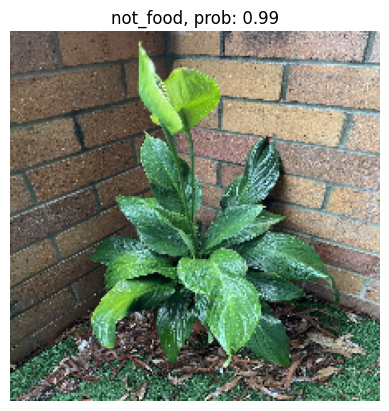

In [ ]:
pred_and_plot(model=model,
              image=plant,
              class_names=class_names)

# Training the ML model

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import zipfile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
# from tensorflow.keras.layers.experimental import preprocessing

# Unzip the downloaded file
def unzip_data(filename):
  """
  Utility function to unzip a zipped file.
  """
  zip_ref = zipfile.ZipFile(filename, "r")
  zip_ref.extractall()
  zip_ref.close()

In [4]:
# Setup data inputs
IMG_SIZE = (224, 224)

def create_data_loaders(train_dir, test_dir, image_size=IMG_SIZE):
  """
  Creates a training and test image BatchDataset from train_dir and test_dir.
  """
  train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                  label_mode="categorical",
                                                                  image_size=image_size,
                                                                    interpolation="bilinear")
  # Note: the test data is the same as the previous experiment, we could
  # skip creating this, but we'll leave this here to practice.
  test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                  label_mode="categorical",
                                                                  image_size=image_size,
                                                                   interpolation="bilinear")

  return train_data, test_data

In [5]:
# Create a data augmentation stage with horizontal flipping, rotations, zooms
data_augmentation = keras.Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2),
  layers.RandomHeight(0.2),
  layers.RandomWidth(0.2),
  # preprocessing.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNetB0
], name ="data_augmentation")

In [7]:
# Setup input shape and base model, freezing the base model layers
INPUT_SHAPE = (224, 224, 3)
BASE_MODEL = tf.keras.applications.EfficientNetB0(include_top=False)

def create_model(input_shape=INPUT_SHAPE, base_model=BASE_MODEL, num_classes=10):
  # Fine-tune?
  base_model.trainable = False

  # Create input layer
  inputs = layers.Input(shape=input_shape, name="input_layer")

  # Add in data augmentation Sequential model as a layer
  x = data_augmentation(inputs)

  # Give base_model inputs (after augmentation) and don't train it
  x = base_model(x, training=False)

  # Pool output features of base model
  x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

  # Put a dense layer on as the output
  outputs = layers.Dense(num_classes, activation="softmax", name="output_layer")(x)

  # Make a model with inputs and outputs
  model = keras.Model(inputs, outputs)

  # Compile the model
  model.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

  return model

In [8]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224, scale=False):
  """
  Reads in an image from filename, turns it into a tensor and reshapes into
  (224, 224, 3).
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode it into a tensor
  img = tf.image.decode_jpeg(img)
  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])
  # Rescale the image (get all values between 0 and 1)
  if scale:
    return img/255.
  else:
    return img

In [9]:
# Get data
import zipfile

# Download data (10 class subset of Food101 - https://www.kaggle.com/dansbecker/food-101)
# Already formatted in standard image classification directory style
# !wget https://github.com/Akash5704/Nutrify_Data/releases/download/v1/Data.zip

!cp "/content/drive/MyDrive/Nutrify/Food Data/Food Data-002.zip" .
unzip_data("Food Data.zip")

^C


FileNotFoundError: [Errno 2] No such file or directory: 'Food Data.zip'

In [ ]:
# How many images in each folder?
import os

# Walk through 10 percent data directory and list number of files
for dirpath, dirnames, filenames in os.walk("Food Data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'Food Data'.
There are 31 directories and 0 images in 'Food Data/train'.
There are 0 directories and 391 images in 'Food Data/train/Samosa'.
There are 0 directories and 750 images in 'Food Data/train/ice_cream'.
There are 0 directories and 750 images in 'Food Data/train/chicken_wings'.
There are 0 directories and 987 images in 'Food Data/train/Chole_bature'.
There are 0 directories and 807 images in 'Food Data/train/Rolls'.
There are 0 directories and 750 images in 'Food Data/train/hamburger'.
There are 0 directories and 224 images in 'Food Data/train/Biryani'.
There are 0 directories and 411 images in 'Food Data/train/Dosa'.
There are 0 directories and 396 images in 'Food Data/train/Poha'.
There are 0 directories and 592 images in 'Food Data/train/Naan'.
There are 0 directories and 750 images in 'Food Data/train/sushi'.
There are 0 directories and 750 images in 'Food Data/train/steak'.
There are 0 directories and 375 images in 'Food Data/train/D

In [ ]:
# Check the file in 10_food_classes_10_percent
!ls -la Food\ Data

total 16
drwxr-xr-x  4 root root 4096 Feb  7 13:52 .
drwxr-xr-x  1 root root 4096 Feb  7 13:51 ..
drwxr-xr-x 33 root root 4096 Feb  7 13:52 test
drwxr-xr-x 33 root root 4096 Feb  7 13:52 train


In [ ]:
# Create tensorboard callback (functionized because need to create a new one for each model)
import datetime
def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

In [ ]:
# Create data loaders
train_data, test_data = create_data_loaders(train_dir="Food Data/train/",
                                            test_dir="Food Data/test/")

Found 23390 files belonging to 31 classes.
Found 6543 files belonging to 31 classes.


In [ ]:
train_data.class_names

['Besan_cheela',
 'Biryani',
 'Chapathi',
 'Chole_bature',
 'Dahl',
 'Dhokla',
 'Dosa',
 'Gulab_jamun',
 'Idli',
 'Jalebi',
 'Kadai_paneer',
 'Naan',
 'Paani_puri',
 'Pakoda',
 'Pav_bhaji',
 'Poha',
 'Rolls',
 'Samosa',
 'Vada_pav',
 'chicken_curry',
 'chicken_wings',
 'donuts',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'not_food',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
import os
from PIL import Image

data_dir = "Food Data"  # Update with your dataset path

for root, dirs, files in os.walk(data_dir):
    for file in files:
        file_path = os.path.join(root, file)
        try:
            img = Image.open(file_path)
            img.verify()  # Verify if it's an image
        except (IOError, SyntaxError):
            print(f"Corrupted or non-image file found: {file_path}")


In [ ]:
from PIL import Image

data_dir = "Food Data"  # Update with your dataset path

for root, dirs, files in os.walk(data_dir):
    for file in files:
        file_path = os.path.join(root, file)
        try:
            img = Image.open(file_path)
            print(f"{file}: {img.format}")  # Print format
        except Exception as e:
            print(f"Error loading {file}: {e}")


Streaming output truncated to the last 5000 lines.
Poha13_jpg.rf.78731c450fcc62c18a0d244c77adc00d.jpg: JPEG
Poha10_jpg.rf.1fb7f21fb6e4e03ec837dee73daeae0c.jpg: JPEG
8c68184523.jpg: JPEG
4fe96eb701.jpg: JPEG
3a59c4d7b6.jpg: JPEG
Poha1_jpg.rf.cf3433fa3f3aefe9887839b24281f2bc.jpg: JPEG
Poha2_jpg.rf.0501b99ae6e801604ba87274385f6333.jpg: JPEG
6ede1680e9.jpg: JPEG
06a10b3c3b.jpg: JPEG
Poha11_jpg.rf.7592a08cc6f64fb11afda2ce65d1c029.jpg: JPEG
0b8929f2d5.jpg: JPEG
8ab801783a.jpg: JPEG
Poha9_jpg.rf.d6dafe2db5cff7bddf03a13d795e9c0f.jpg: JPEG
Poha16_jpg.rf.6ff36833d0dad18f5746172330b3219c.jpg: JPEG
Poha5_jpg.rf.4f03cf2e2d71fa59a91c3fe4e47a7fee.jpg: JPEG
00000004_resized.png: PNG
059.jpg: JPEG
079.jpg: JPEG
00000021_resized.png: PNG
049.jpg: JPEG
00000085_resized.png: PNG
002.jpg: JPEG
00000055_resized.png: PNG
081.jpg: JPEG
00000056_resized.png: PNG
072.jpg: JPEG
074.jpg: JPEG
00000051_resized.png: PNG
00000079_resized.png: PNG
00000092_resized.png: PNG
058.jpg: JPEG
00000080_resized.png: PNG
0000

In [ ]:
for root, dirs, files in os.walk(data_dir):
    for file in files:
        file_path = os.path.join(root, file)
        new_file_path = file_path.rsplit(".", 1)[0] + ".jpg"
        try:
            img = Image.open(file_path).convert("RGB")
            img.save(new_file_path, "JPEG")
            print(f"Converted {file_path} to {new_file_path}")
        except Exception as e:
            print(f"Skipping {file_path}: {e}")

Converted Food Data/train/Samosa/samosa67_jpg.rf.776d1e7a8a21a4434550c50ceff3b2bd.jpg to Food Data/train/Samosa/samosa67_jpg.rf.776d1e7a8a21a4434550c50ceff3b2bd.jpg
Converted Food Data/train/Samosa/samosa43_jpg.rf.ecdcc7db25ec754c2a771e7b733a0528.jpg to Food Data/train/Samosa/samosa43_jpg.rf.ecdcc7db25ec754c2a771e7b733a0528.jpg
Converted Food Data/train/Samosa/214.jpg to Food Data/train/Samosa/214.jpg
Converted Food Data/train/Samosa/110.jpg to Food Data/train/Samosa/110.jpg
Converted Food Data/train/Samosa/samosa97_jpg.rf.fa6f3f6a22574c2970849cf8b6a99a10.jpg to Food Data/train/Samosa/samosa97_jpg.rf.fa6f3f6a22574c2970849cf8b6a99a10.jpg
Converted Food Data/train/Samosa/095.jpg to Food Data/train/Samosa/095.jpg
Converted Food Data/train/Samosa/252.jpg to Food Data/train/Samosa/252.jpg
Converted Food Data/train/Samosa/samosa48_jpg.rf.5003501df4d7a970b3d9ee2302237a1e.jpg to Food Data/train/Samosa/samosa48_jpg.rf.5003501df4d7a970b3d9ee2302237a1e.jpg
Converted Food Data/train/Samosa/143.jpg

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Streaming output truncated to the last 5000 lines.
Converted Food Data/test/Poha/Poha13_jpg.rf.78731c450fcc62c18a0d244c77adc00d.jpg to Food Data/test/Poha/Poha13_jpg.rf.78731c450fcc62c18a0d244c77adc00d.jpg
Converted Food Data/test/Poha/Poha10_jpg.rf.1fb7f21fb6e4e03ec837dee73daeae0c.jpg to Food Data/test/Poha/Poha10_jpg.rf.1fb7f21fb6e4e03ec837dee73daeae0c.jpg
Converted Food Data/test/Poha/8c68184523.jpg to Food Data/test/Poha/8c68184523.jpg
Converted Food Data/test/Poha/4fe96eb701.jpg to Food Data/test/Poha/4fe96eb701.jpg
Converted Food Data/test/Poha/3a59c4d7b6.jpg to Food Data/test/Poha/3a59c4d7b6.jpg
Converted Food Data/test/Poha/Poha1_jpg.rf.cf3433fa3f3aefe9887839b24281f2bc.jpg to Food Data/test/Poha/Poha1_jpg.rf.cf3433fa3f3aefe9887839b24281f2bc.jpg
Converted Food Data/test/Poha/Poha2_jpg.rf.0501b99ae6e801604ba87274385f6333.jpg to Food Data/test/Poha/Poha2_jpg.rf.0501b99ae6e801604ba87274385f6333.jpg
Converted Food Data/test/Poha/6ede1680e9.jpg to Food Data/test/Poha/6ede1680e9.jpg
C

In [ ]:
import shutil

cache_dir = "Food Data/.cache"
if os.path.exists(cache_dir):
    shutil.rmtree(cache_dir)
    print("Cache cleared.")


In [ ]:
# Create model
model_3 = create_model(num_classes=len(train_data.class_names))

# Fit model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        validation_data=test_data,
                        validation_steps=int(0.25*len(test_data)))

Epoch 1/5
731/731 ━━━━━━━━━━━━━━━━━━━━ 106s 130ms/step - accuracy: 0.6089 - loss: 1.6110 - val_accuracy: 0.8738 - val_loss: 0.5253
Epoch 2/5
731/731 ━━━━━━━━━━━━━━━━━━━━ 142s 130ms/step - accuracy: 0.8187 - loss: 0.6693 - val_accuracy: 0.8695 - val_loss: 0.4695
Epoch 3/5
731/731 ━━━━━━━━━━━━━━━━━━━━ 88s 120ms/step - accuracy: 0.8471 - loss: 0.5607 - val_accuracy: 0.8787 - val_loss: 0.4317
Epoch 4/5
731/731 ━━━━━━━━━━━━━━━━━━━━ 84s 114ms/step - accuracy: 0.8593 - loss: 0.5072 - val_accuracy: 0.8842 - val_loss: 0.4068
Epoch 5/5
731/731 ━━━━━━━━━━━━━━━━━━━━ 145s 118ms/step - accuracy: 0.8643 - loss: 0.4789 - val_accuracy: 0.8873 - val_loss: 0.3826


In [ ]:
# Save model_3...
model_3.save("efficientnet_model_3_12_classes.h5")

In [ ]:
# Save model_3...
model_3.save("efficientnet_model_3_12_classes.keras")

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/cs329s-ml-deployment-tutorial/main/food-images/plant.jpeg

--2025-02-07 14:17:02--  https://raw.githubusercontent.com/mrdbourke/cs329s-ml-deployment-tutorial/main/food-images/plant.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 542790 (530K) [image/jpeg]
Saving to: ‘plant.jpeg’

plant.jpeg          100%[===================>] 530.07K  --.-KB/s    in 0.03s   

2025-02-07 14:17:02 (15.7 MB/s) - ‘plant.jpeg’ saved [542790/542790]



In [ ]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224, scale=False):
  """
  Reads in an image from filename, turns it into a tensor and reshapes into
  (224, 224, 3).
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode it into a tensor
  img = tf.image.decode_jpeg(img)
  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])
  # Rescale the image (get all values between 0 and 1)
  if scale:
    return img/255.
  else:
    return img

In [ ]:
plant = load_and_prep_image("plant.jpeg")
plant = tf.cast(tf.round(plant), dtype=tf.int32)
plant

<tf.Tensor: shape=(224, 224, 3), dtype=int32, numpy=
array([[[110,  96,  95],
        [107,  93,  92],
        [ 88,  74,  71],
        ...,
        [141, 155, 164],
        [207, 210, 209],
        [242, 241, 237]],

       [[117, 106, 104],
        [117, 106, 103],
        [116, 105, 101],
        ...,
        [132, 144, 152],
        [207, 207, 208],
        [202, 199, 201]],

       [[107,  96,  92],
        [119, 108, 104],
        [102,  91,  87],
        ...,
        [177, 187, 189],
        [206, 204, 202],
        [204, 200, 197]],

       ...,

       [[ 20,  70,  49],
        [ 37,  79,  57],
        [111, 159, 133],
        ...,
        [122, 175, 142],
        [ 84, 143, 110],
        [ 49, 116,  80]],

       [[120, 154, 131],
        [137, 164, 147],
        [108, 127, 111],
        ...,
        [103, 169, 133],
        [ 46,  95,  66],
        [ 83, 143, 110]],

       [[ 43,  83,  62],
        [ 20,  49,  31],
        [ 33,  74,  54],
        ...,
        [ 53, 117,  8

In [ ]:
model_3.predict(tf.expand_dims(plant, axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


array([[5.08017638e-06, 3.68735550e-06, 1.33542135e-05, 4.77285539e-07,
        5.98045608e-06, 7.26767830e-05, 2.91692304e-05, 1.83436759e-06,
        1.14711851e-03, 1.91536833e-06, 3.96437135e-05, 1.08741624e-05,
        4.71597878e-06, 3.31896328e-04, 7.32328203e-07, 2.51986476e-05,
        1.35561586e-05, 1.25198872e-04, 3.19655119e-05, 9.59592035e-06,
        5.91903154e-05, 6.78656477e-07, 9.82181882e-05, 1.71317297e-04,
        1.74858229e-04, 8.89135932e-04, 9.95892406e-01, 1.37390480e-05,
        9.10839844e-06, 2.61849462e-04, 5.54799743e-04]], dtype=float32)

In [ ]:
import matplotlib.pyplot as plt

def pred_and_plot(model, image, class_names):
  pred_probs = model_3.predict(tf.expand_dims(image, axis=0))
  pred_class = class_names[tf.argmax(pred_probs[0])]

  plt.figure()
  plt.imshow(image)
  plt.title(f"{pred_class}, prob: {tf.reduce_max(pred_probs):.2f}")
  plt.axis(False);

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


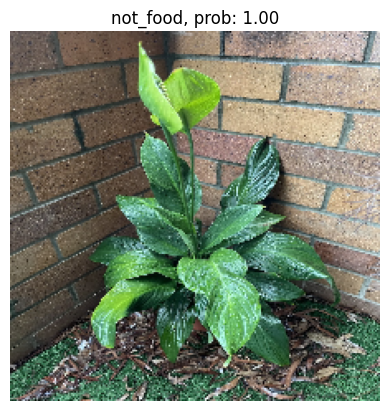

In [ ]:
pred_and_plot(model=model_3,
              image=plant,
              class_names=train_data.class_names)

In [ ]:
train_data.class_names

['Besan_cheela',
 'Biryani',
 'Chapathi',
 'Chole_bature',
 'Dahl',
 'Dhokla',
 'Dosa',
 'Gulab_jamun',
 'Idli',
 'Jalebi',
 'Kadai_paneer',
 'Naan',
 'Paani_puri',
 'Pakoda',
 'Pav_bhaji',
 'Poha',
 'Rolls',
 'Samosa',
 'Vada_pav',
 'chicken_curry',
 'chicken_wings',
 'donuts',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'not_food',
 'pizza',
 'ramen',
 'steak',
 'sushi']